# VCHE Benchmark Analysis and Graphs For OR -- 1000 runs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [2]:
# Import the results for each benchmark Ran on cluster Nov 26th commit c0f814662d3aae232da28f868cc069aed8b1484e
# averaged 1000 runs 
# REMOVING THE PRE_VERIF and adding in in Ecd
or_bench={'Type':"baseline",  'PN':15, 'LogT': 55, 'Lbd': 0,  'Ecd': 1.31601503E+08,              'Enc': 2.200017337E+09, 'Eval': 5.39448581E+08, 'Verif': 0           , 'Dec':2.7723991E+07, 'Dcd': 6.548494E+06}
or_V1   ={'Type':"REP"      , 'PN':15, 'LogT': 55, 'Lbd': 64, 'Ecd': 1.428434125E+09,             'Enc': 2.150153518E+09, 'Eval': 5.22154066E+08, 'Verif': 9.401604E+06, 'Dec':3.1519549E+07, 'Dcd': 1.2136083E+07}
or_V1PRF={'Type':"REP PRF"  , 'PN':15, 'LogT': 55, 'Lbd': 64, 'Ecd': 4.718777746E+09+3.697784E+06,'Enc': 1.853151028E+09, 'Eval': 3.74484379E+08, 'Verif': 7.572510E+06, 'Dec':3.6790251E+07, 'Dcd': 7.602526E+06}
or_V2   ={'Type':"PE"       , 'PN':15, 'LogT': 56, 'Lbd': 54, 'Ecd': 2.890553646E+09,             'Enc': 3.811628682E+09, 'Eval': 1.846618634E+09,'Verif': 2.869025E+06, 'Dec':8.6322989E+07, 'Dcd': 5.9593934E+07}
timings ={'Bench':or_bench, 'REP':or_V1, 'RE+':or_V1PRF, 'PE':or_V2}


In [3]:
pd.DataFrame(createDFDiffR(timings))

,,Ecd,Enc,Eval,Dec,Verif,Dcd
Create,REP,0.556194,0.000000,0.00000,0.000000,0.000000,0.000000
Eval.,REP,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Verify,REP,0.000000,0.000000,0.00000,0.110747,0.274319,0.163034
Create,RE+,1.968964,0.000000,0.00000,0.000000,0.000000,0.000000
Verify,RE+,0.000000,0.000000,0.00000,0.264535,0.220950,0.030754
Create,PE,1.183278,0.691198,0.00000,0.000000,0.000000,0.000000
Eval.,PE,0.000000,0.000000,2.42316,0.000000,0.000000,0.000000
Verify,PE,0.000000,0.000000,0.00000,1.709797,0.083712,1.547756


In [4]:
pd.DataFrame(timings)

,Bench,REP,RE+,PE
Type,baseline,REP,REP PRF,PE
PN,15,15,15,15
LogT,55,55,55,56
Lbd,0,64,64,54
Ecd,131601503.0,1428434125.0,4722475530.0,2890553646.0
Enc,2200017337.0,2150153518.0,1853151028.0,3811628682.0
Eval,539448581.0,522154066.0,374484379.0,1846618634.0
Verif,0,9401604.0,7572510.0,2869025.0
Dec,27723991.0,31519549.0,36790251.0,86322989.0
Dcd,6548494.0,12136083.0,7602526.0,59593934.0


In [5]:
sns.set(font_scale=3)
#color = sns.color_palette("deep", 10) #["green", "Black", "Red", "Yellow", "peru", "Grey", "aqua"]
sns.set_palette(sns.cubehelix_palette(n_colors=7, start=0.8,rot=3,hue=1,gamma=1,dark=0.25,light=0.75))
sns.set_style("dark", {
   'axes.grid': True,
   'axes.edgecolor': 'none'
})
plt.rcParams['text.usetex'] = True #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = r'\usepackage{sansmath} \sansmath' #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = 'Helvetica, Avant Garde, Computer Modern Sans serif' # Choose a nice font here


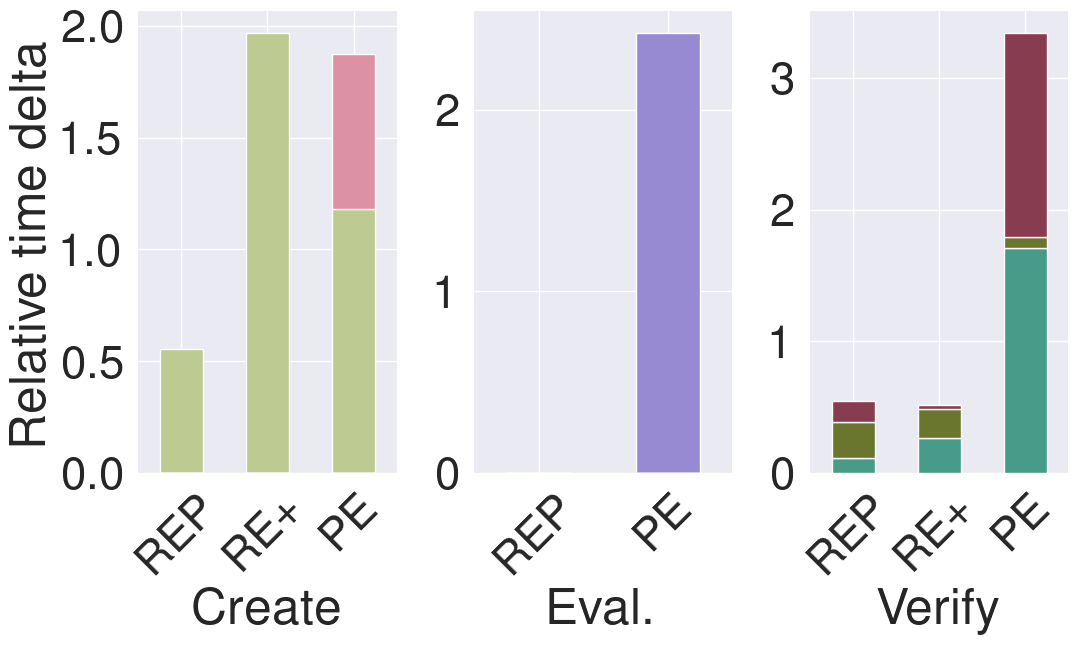

In [6]:
# Plot the barplot Relative DIFFERENCE with the baseline
timings_df = pd.DataFrame(createDFDiffR(timings))

n_subplots = len(timings_df.index.levels[0])
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=False, figsize=(12, 6))  # width, height
axes[0].set_ylabel('Relative time delta')
#axes[0].xaxis.tick_top()

graph = dict(zip(timings_df.index.levels[0], axes[-n_subplots:]))
plots = list(map(lambda x: plot_function(x, graph[x], timings_df), graph))
fig.subplots_adjust(wspace=0.3)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Figures/barplotOR1000.pdf', bbox_inches='tight')
plt.show()